# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.ensemble import GradientBoostingRegressor

# Import Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

# Explore the Data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

In [4]:
for i in train.select_dtypes("object").columns:
    print (i , len(train[i].unique().tolist()))

bin_3 2
bin_4 2
nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1220
nom_8 2215
nom_9 11981
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192


In [ ]:
for i in test.select_dtypes("object").columns:
    print (i , len(test[i].unique().tolist()))

In [5]:
train.drop(['nom_9', 'nom_8', 'nom_7'], axis='columns', inplace=True)
test.drop(['nom_9', 'nom_8', 'nom_7'],axis='columns', inplace=True)

In [6]:
train.shape

(300000, 22)

In [7]:
test.shape

(200000, 21)

In [8]:
for i in train.select_dtypes("object").columns:
    print (i , train[i].unique().tolist())

bin_3 ['T', 'F']
bin_4 ['Y', 'N']
nom_0 ['Green', 'Blue', 'Red']
nom_1 ['Triangle', 'Trapezoid', 'Polygon', 'Square', 'Star', 'Circle']
nom_2 ['Snake', 'Hamster', 'Lion', 'Cat', 'Dog', 'Axolotl']
nom_3 ['Finland', 'Russia', 'Canada', 'Costa Rica', 'China', 'India']
nom_4 ['Bassoon', 'Piano', 'Theremin', 'Oboe']
nom_5 ['50f116bcf', 'b3b4d25d0', '3263bdce5', 'f12246592', '5b0f5acd5', '46cab09da', 'be5592604', '72f8028dc', '4604905e7', 'ad95dc0ee', '2ff007c26', 'a35c346aa', 'dbfb714a4', 'e1558b071', '39647c92a', 'ee55b9d67', '416a8f3ab', '91bde92fa', '3aa9329e2', '568550f04', 'caf83c0b5', '908a1b9c9', 'e844a1f66', 'dbc448931', '2979f0d45', '96c73114c', 'b7bb45938', '7da3e4aec', 'be4578201', 'dc07effb0', '88917a066', 'f2d59cf51', '5d18641ff', '9347491f2', '475e79160', 'e70a6270d', '5b1a9f841', 'e0efe9d20', 'd1b1709e8', '9bb7ea2da', '6fec43dd8', '0dee9b39a', '527ded12a', '321bf770e', 'f7821e391', '0de4acd31', '185ba0a59', '4845cc770', 'bdb9fef4a', '3fef1a765', '2cc9e16b9', 'fd04a970f', '81f

## Univariate Box plots

<AxesSubplot: >

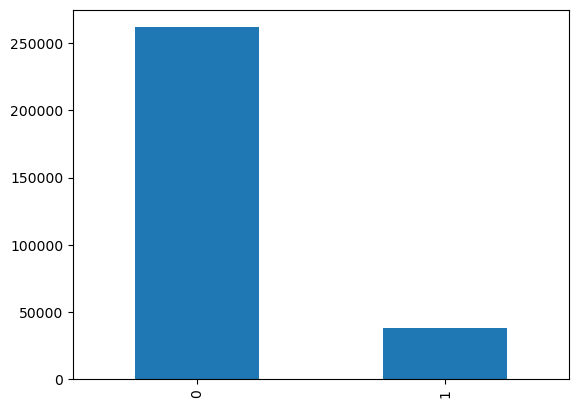

In [9]:
train['bin_0'].value_counts().plot.bar()

<AxesSubplot: >

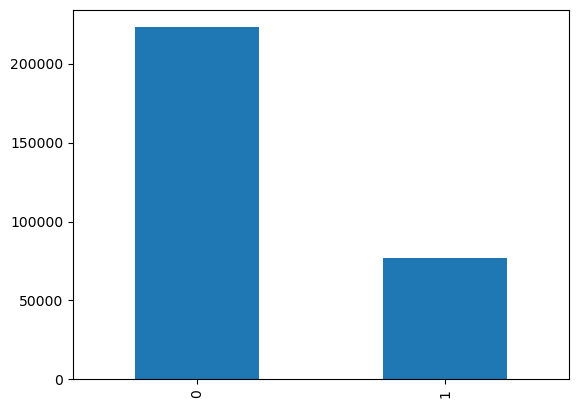

In [10]:
train['bin_1'].value_counts().plot.bar()

<AxesSubplot: >

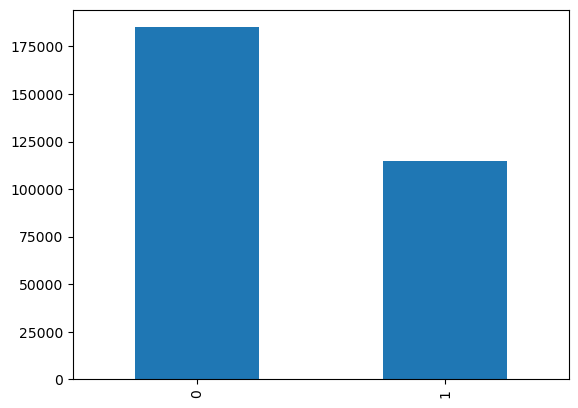

In [11]:
train['bin_2'].value_counts().plot.bar()

<AxesSubplot: >

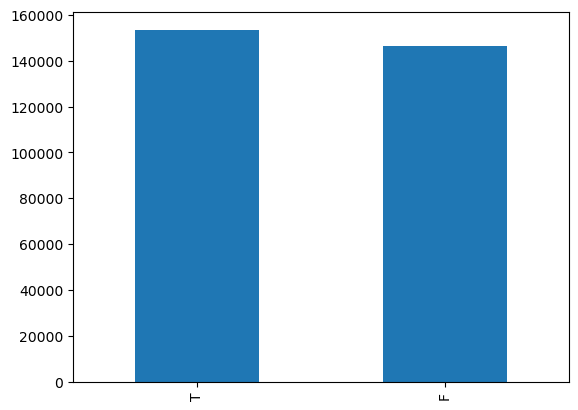

In [12]:
train['bin_3'].value_counts().plot.bar()

<AxesSubplot: >

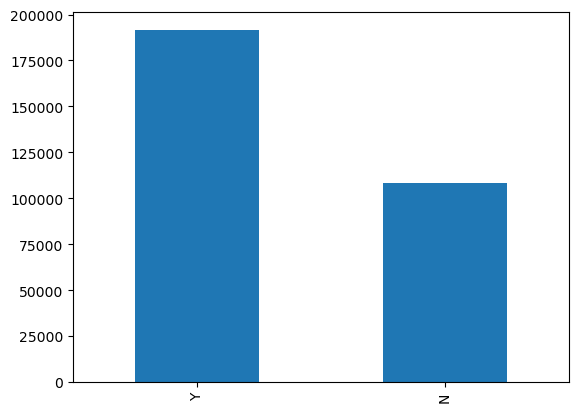

In [13]:
train['bin_4'].value_counts().plot.bar()

<AxesSubplot: >

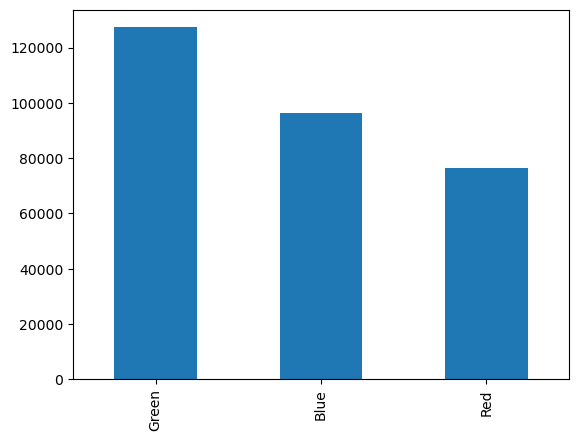

In [14]:
train['nom_0'].value_counts().plot.bar()

<AxesSubplot: >

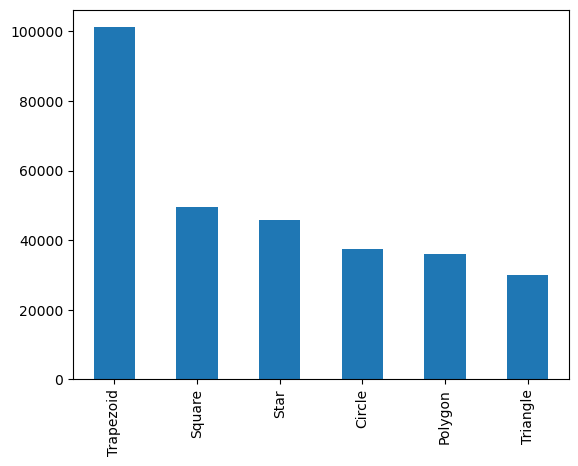

In [15]:
train['nom_1'].value_counts().plot.bar()

<AxesSubplot: >

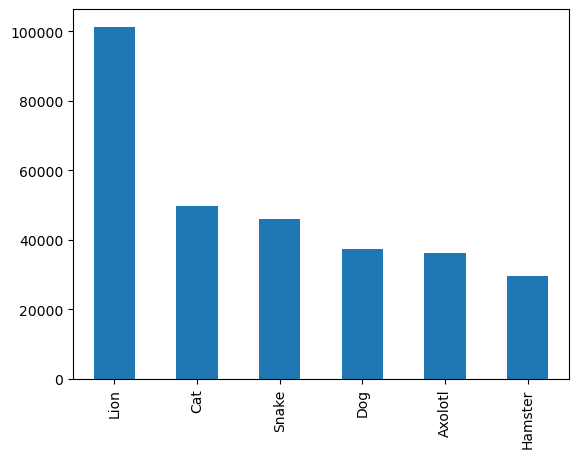

In [16]:
train['nom_2'].value_counts().plot.bar()

<AxesSubplot: >

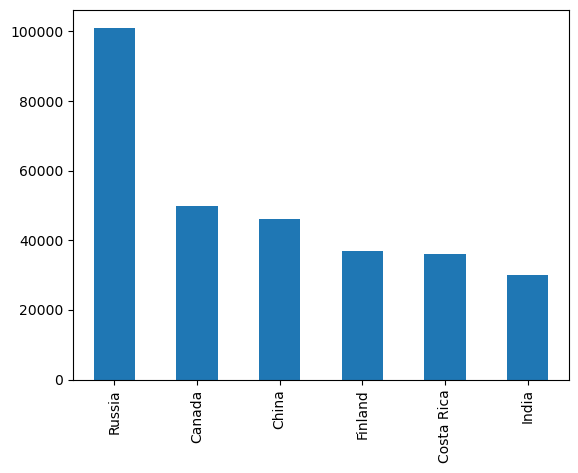

In [17]:
train['nom_3'].value_counts().plot.bar()

<AxesSubplot: >

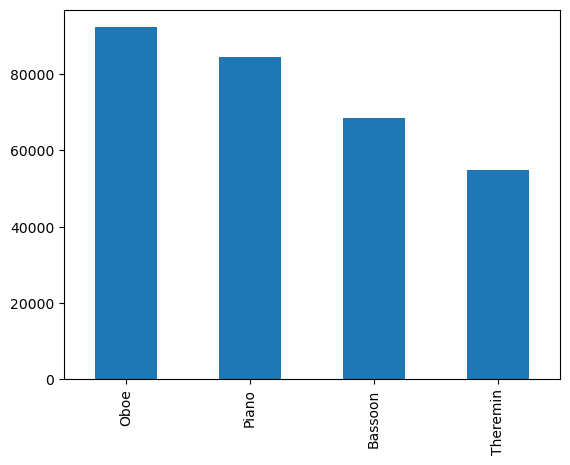

In [18]:
train['nom_4'].value_counts().plot.bar()

<AxesSubplot: >

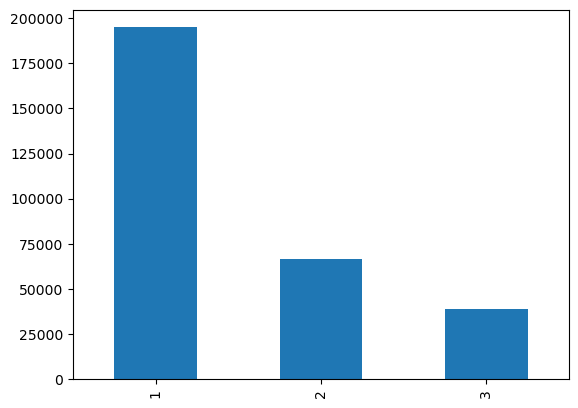

In [19]:
train['ord_0'].value_counts().plot.bar()

<AxesSubplot: >

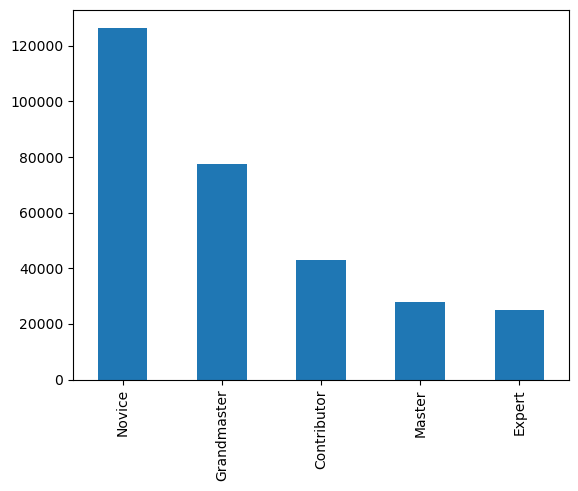

In [20]:
train['ord_1'].value_counts().plot.bar()

<AxesSubplot: >

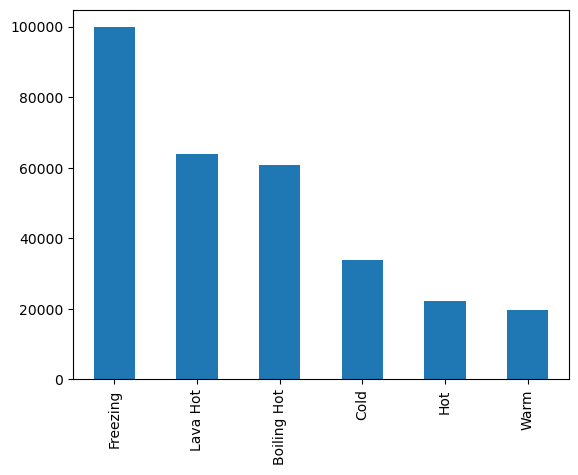

In [21]:
train['ord_2'].value_counts().plot.bar()

<AxesSubplot: >

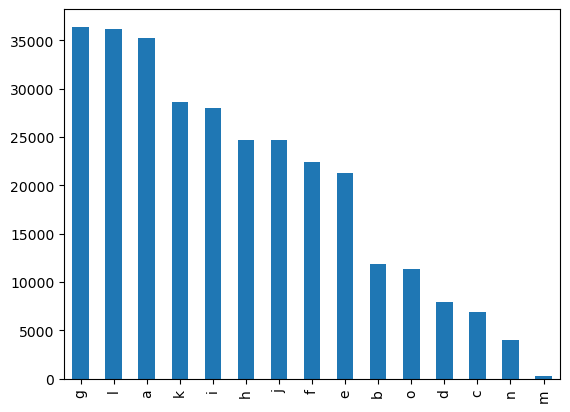

In [22]:
train['ord_3'].value_counts().plot.bar()

<AxesSubplot: >

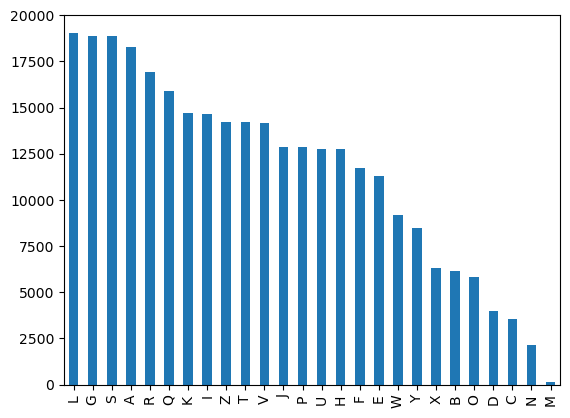

In [23]:
train['ord_4'].value_counts().plot.bar()

<AxesSubplot: >

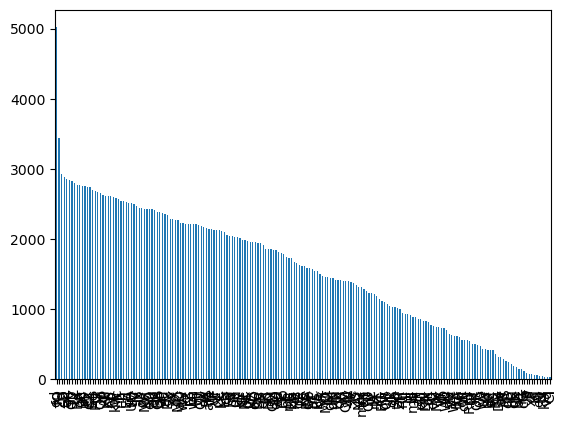

In [24]:
train['ord_5'].value_counts().plot.bar()

<AxesSubplot: >

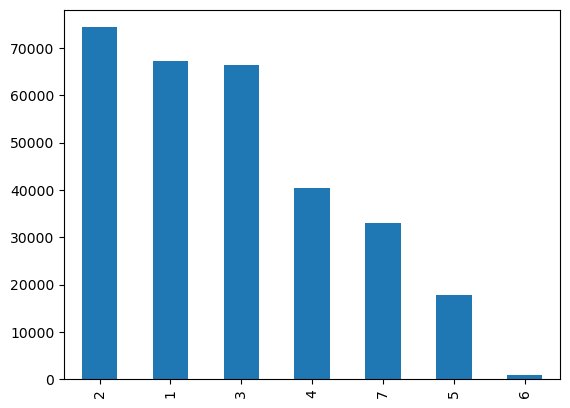

In [25]:
train['day'].value_counts().plot.bar()

<AxesSubplot: >

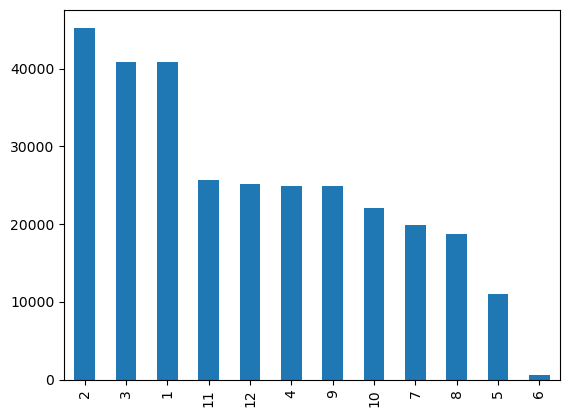

In [26]:
train['month'].value_counts().plot.bar()

# Corrections to the data

## bin_3 column changed from T/F to 1 / 0

In [29]:
train.bin_3.replace({'T':1 , 'F': 0}, inplace=True)

In [30]:
test.bin_3.replace({'T':1 , 'F': 0}, inplace=True)

## bin_4 changed from Y/N to 1/0

In [31]:
train.bin_4.replace({'Y':1 , 'N': 0}, inplace=True)

In [32]:
test.bin_4.replace({'Y':1 , 'N': 0}, inplace=True)

In [33]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_6,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,Green,Triangle,Snake,Finland,...,3ac1b8814,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,...,fbcb50fc1,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,...,0922e3cb8,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,...,50d7ad46a,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,...,1fe17a1fd,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [34]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_5,nom_6,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,1,1,Blue,Triangle,Axolotl,Finland,...,0870b0a5d,9ceb19dd6,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,1,0,Red,Square,Lion,Canada,...,a5c276589,1ad744242,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,0,1,Blue,Square,Dog,China,...,568550f04,1fe17a1fd,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,1,1,Red,Star,Cat,China,...,c5725677e,a6542cec0,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,0,0,Red,Trapezoid,Dog,China,...,e70a6270d,97b6a3518,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [22]:
train.day.unique().tolist()

[2, 7, 5, 4, 3, 1, 6]

In [23]:
train.month.unique().tolist()

[2, 8, 1, 4, 10, 3, 7, 9, 12, 11, 5, 6]

## Get dummies for nominal columns

In [35]:
nom_train = train[["nom_0", "nom_1" , "nom_2", "nom_3" , "nom_4", "nom_5" , "nom_6"]]

In [36]:
nom_train = pd.get_dummies(nom_train)

In [37]:
nom_train.shape

(300000, 769)

In [38]:
nom_test = test[["nom_0", "nom_1" , "nom_2", "nom_3" , "nom_4", "nom_5" , "nom_6"]]
nom_test = pd.get_dummies(nom_test)

In [39]:
nom_test.shape

(200000, 769)

## Ordinal Columns Treatment

In [40]:
ord_train = train[["ord_0", "ord_1" , "ord_2" , "ord_3" , "ord_4" , "ord_5"]]

In [41]:
ord_test = test[["ord_0", "ord_1" , "ord_2" , "ord_3" , "ord_4" , "ord_5"]]

In [42]:
train.ord_1.unique().tolist()

['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master']

In [43]:
enc_ord1 = OrdinalEncoder(categories=[['Novice', 'Contributor' , 'Expert' , 'Master' , 'Grandmaster']])

In [44]:
enc_ord1.fit(train[["ord_1"]])

OrdinalEncoder(categories=[['Novice', 'Contributor', 'Expert', 'Master',
                            'Grandmaster']])

In [45]:
train["ord_1"] = enc_ord1.transform(train[['ord_1']])

In [46]:
enc_ord1.fit(test[["ord_1"]])
test["ord_1"] = enc_ord1.transform(test[['ord_1']])

In [47]:
train.ord_2.unique().tolist()

['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm']

In [48]:
enc_ord2 = OrdinalEncoder(categories=[['Freezing', 'Cold' , 'Warm' , 'Hot' , 'Boiling Hot' , 'Lava Hot']])

In [49]:
enc_ord2.fit(train[["ord_2"]])

OrdinalEncoder(categories=[['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot',
                            'Lava Hot']])

In [50]:
train["ord_2"] = enc_ord2.transform(train[['ord_2']])

In [51]:
enc_ord2.fit(test[["ord_2"]])
test["ord_2"] = enc_ord2.transform(test[['ord_2']])

In [52]:
enc_ord3 = OrdinalEncoder()

In [53]:
enc_ord3.fit(train[['ord_3']])

OrdinalEncoder()

In [54]:
train['ord_3'] = enc_ord3.transform(train[['ord_3']])

In [55]:
enc_ord3.fit(test[['ord_3']])
test['ord_3'] = enc_ord3.transform(test[['ord_3']])

In [56]:
enc_ord4 = OrdinalEncoder()

In [57]:
enc_ord4.fit(train[['ord_4']])

OrdinalEncoder()

In [58]:
train['ord_4'] = enc_ord4.transform(train[['ord_4']])

In [59]:
enc_ord4.fit(test[['ord_4']])
test['ord_4'] = enc_ord4.transform(test[['ord_4']])

In [60]:
enc_ord5 = OrdinalEncoder()

In [61]:
enc_ord5.fit(train[['ord_5']])

OrdinalEncoder()

In [62]:
train['ord_5'] = enc_ord5.transform(train[['ord_5']])

In [63]:
enc_ord5.fit(test[['ord_5']])
test['ord_5'] = enc_ord5.transform(test[['ord_5']])

In [64]:
train_new = pd.merge(train , nom_train, left_index=True, right_index=True)

In [65]:
test_new = pd.merge(test , nom_test, left_index=True, right_index=True)

In [66]:
train_new.shape

(300000, 791)

In [67]:
train_new.drop(["nom_0", "nom_1", "nom_2" , "nom_3" , "nom_4", "nom_5", "nom_6"], axis='columns', inplace=True)

In [68]:
test_new.drop(["nom_0", "nom_1", "nom_2" , "nom_3" , "nom_4", "nom_5", "nom_6"], axis='columns', inplace=True)

In [56]:
train_new.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,...,nom_6_fc613f31d,nom_6_fc791ebea,nom_6_fc88900c4,nom_6_fc88d723d,nom_6_fd2344f16,nom_6_fd9370b9e,nom_6_fe0b55cd2,nom_6_fe0cddc2c,nom_6_fe77c71bd,nom_6_ffc60be1c
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,0.127503,0.256607,0.383223,0.511783,0.638777,1.479567,1.622907,2.339350,6.609097,...,0.000680,0.001127,0.002690,0.000977,0.001347,0.002883,0.000227,0.001153,0.000800,0.001930
std,86602.684716,0.333537,0.436761,0.486173,0.499862,0.480356,0.712524,1.677608,2.031744,3.829374,...,0.026068,0.033547,0.051795,0.031236,0.036672,0.053619,0.015054,0.033941,0.028273,0.043889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,224999.250000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
x = train_new.drop(['id' , 'target'], axis = 'columns')

In [70]:
y = train_new['target']

# Model Building -- Bagging Classifier

In [71]:
model = BaggingClassifier(oob_score = True ,n_jobs=-1, n_estimators= 100, random_state= 400,
                            base_estimator=DecisionTreeClassifier())

In [72]:
model.fit(x,y)

MemoryError: Unable to allocate 1.75 GiB for an array with shape (782, 300000) and data type float64

In [75]:
model.oob_score_

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [86]:
model.score(x,y)

0.7609933333333333

In [87]:
test_x = test_new.drop(['id'], axis = 'columns')
ids = test_new['id']

In [82]:
x.drop(['nom_7_3460d7c4b'], axis='columns', inplace=True)

In [88]:
result = model.predict(test_x)

In [89]:
result = pd.DataFrame(result, columns=['target'])

In [90]:
result1 = pd.merge(ids, result, left_index=True, right_index=True)
result1

,id,target
0,300000,0
1,300001,1
2,300002,0
3,300003,0
4,300004,1
...,...,...
199995,499995,0
199996,499996,0
199997,499997,0
199998,499998,1


In [91]:
result1.to_csv('./data/submission.csv', index=False)